# 🦾 Pivot from long to wide format

> Demonstrates the following:
> 
> - Different Polars pivot manuevers to change long form to wide form DataFrames.

Data is returned as a long format, dataframe. This means there is one unique observation (air temperature, humidity, wind speed, etc.) per row. It's often useful to pivot variables into columns. This can be done with Polars. I encourage users of SynopticPy to become familiar with Polars for DataFrame manipulation.

In [1]:
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns

import synoptic

In [2]:
s = synoptic.Latest(stid="ukbkb,wbb", vars="air_temp,dew_point_temperature")
df = s.df()
df

🚚💨 Speedy delivery from Synoptic's latest service.
📦 Received data from 2 stations (0.15 seconds).


stid,variable,sensor_index,is_derived,value,date_time,units,id,name,elevation,latitude,longitude,mnet_id,state,timezone,elev_dem,period_of_record_start,period_of_record_end,qc_flagged,is_restricted,is_active
str,str,u32,bool,f64,"datetime[μs, UTC]",str,u32,str,f64,f64,f64,u32,str,str,f64,"datetime[μs, UTC]","datetime[μs, UTC]",bool,bool,bool
"""WBB""","""air_temp""",1,false,0.972,2024-12-03 05:30:00 UTC,"""Celsius""",1,"""U of U William Browning Buildi…",4806.0,40.76623,-111.84755,153,"""UT""","""America/Denver""",4727.7,1997-01-01 00:00:00 UTC,2024-12-03 05:05:00 UTC,false,false,true
"""UKBKB""","""air_temp""",1,false,0.0,2024-12-03 05:30:00 UTC,"""Celsius""",37032,"""EW2355 Spanish Fork""",4734.0,40.09867,-111.62767,65,"""UT""","""America/Denver""",4740.8,2013-03-13 00:00:00 UTC,2024-12-03 05:00:00 UTC,false,false,true
"""WBB""","""dew_point_temperature""",1,true,-3.49,2024-12-03 05:30:00 UTC,"""Celsius""",1,"""U of U William Browning Buildi…",4806.0,40.76623,-111.84755,153,"""UT""","""America/Denver""",4727.7,1997-01-01 00:00:00 UTC,2024-12-03 05:05:00 UTC,false,false,true
"""UKBKB""","""dew_point_temperature""",1,true,-3.6,2024-12-03 05:30:00 UTC,"""Celsius""",37032,"""EW2355 Spanish Fork""",4734.0,40.09867,-111.62767,65,"""UT""","""America/Denver""",4740.8,2013-03-13 00:00:00 UTC,2024-12-03 05:00:00 UTC,false,false,true


SynopticPy provides a basic pivot method that likely gets the job done in most cases.

In [3]:
df.synoptic.pivot()

date_time,stid,latitude,longitude,elevation,air_temp,dew_point_temperature
"datetime[μs, UTC]",str,f64,f64,f64,f64,f64
2024-12-03 05:30:00 UTC,"""WBB""",40.76623,-111.84755,4806.0,0.972,-3.49
2024-12-03 05:30:00 UTC,"""UKBKB""",40.09867,-111.62767,4734.0,0.0,-3.6


With a pivotted DataFrame, you can use the `with_wind_uv` method.

In [4]:
synoptic.TimeSeries(stid="WBB", vars="wind_speed,wind_speed", recent="12h").df()

🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.16 seconds).


stid,date_time,variable,sensor_index,is_derived,value,units,id,name,elevation,latitude,longitude,mnet_id,state,timezone,elev_dem,period_of_record_start,period_of_record_end,qc_flagged,is_restricted,is_active
str,"datetime[μs, UTC]",str,u32,bool,f64,str,u32,str,f64,f64,f64,u32,str,str,f64,"datetime[μs, UTC]","datetime[μs, UTC]",bool,bool,bool
"""WBB""",2024-12-02 17:39:00 UTC,"""wind_speed""",1,false,0.962,"""m/s""",1,"""U of U William Browning Buildi…",4806.0,40.76623,-111.84755,153,"""UT""","""America/Denver""",4727.7,1997-01-01 00:00:00 UTC,2024-12-03 05:05:00 UTC,false,false,true
"""WBB""",2024-12-02 17:40:00 UTC,"""wind_speed""",1,false,0.561,"""m/s""",1,"""U of U William Browning Buildi…",4806.0,40.76623,-111.84755,153,"""UT""","""America/Denver""",4727.7,1997-01-01 00:00:00 UTC,2024-12-03 05:05:00 UTC,false,false,true
"""WBB""",2024-12-02 17:41:00 UTC,"""wind_speed""",1,false,0.386,"""m/s""",1,"""U of U William Browning Buildi…",4806.0,40.76623,-111.84755,153,"""UT""","""America/Denver""",4727.7,1997-01-01 00:00:00 UTC,2024-12-03 05:05:00 UTC,false,false,true
"""WBB""",2024-12-02 17:42:00 UTC,"""wind_speed""",1,false,0.427,"""m/s""",1,"""U of U William Browning Buildi…",4806.0,40.76623,-111.84755,153,"""UT""","""America/Denver""",4727.7,1997-01-01 00:00:00 UTC,2024-12-03 05:05:00 UTC,false,false,true
"""WBB""",2024-12-02 17:43:00 UTC,"""wind_speed""",1,false,0.571,"""m/s""",1,"""U of U William Browning Buildi…",4806.0,40.76623,-111.84755,153,"""UT""","""America/Denver""",4727.7,1997-01-01 00:00:00 UTC,2024-12-03 05:05:00 UTC,false,false,true
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""WBB""",2024-12-03 05:27:00 UTC,"""wind_speed""",1,false,0.509,"""m/s""",1,"""U of U William Browning Buildi…",4806.0,40.76623,-111.84755,153,"""UT""","""America/Denver""",4727.7,1997-01-01 00:00:00 UTC,2024-12-03 05:05:00 UTC,false,false,true
"""WBB""",2024-12-03 05:28:00 UTC,"""wind_speed""",1,false,0.458,"""m/s""",1,"""U of U William Browning Buildi…",4806.0,40.76623,-111.84755,153,"""UT""","""America/Denver""",4727.7,1997-01-01 00:00:00 UTC,2024-12-03 05:05:00 UTC,false,false,true
"""WBB""",2024-12-03 05:29:00 UTC,"""wind_speed""",1,false,0.319,"""m/s""",1,"""U of U William Browning Buildi…",4806.0,40.76623,-111.84755,153,"""UT""","""America/Denver""",4727.7,1997-01-01 00:00:00 UTC,2024-12-03 05:05:00 UTC,false,false,true


In [5]:
df = (
    synoptic.TimeSeries(stid="WBB", vars="wind_speed,wind_direction", recent="12h")
    .df()
    .synoptic.pivot()
    .synoptic.with_wind_uv()
)
df

🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.18 seconds).


date_time,stid,latitude,longitude,elevation,wind_speed,wind_direction,wind_u,wind_v
"datetime[μs, UTC]",str,f64,f64,f64,f64,f64,f64,f64
2024-12-02 17:39:00 UTC,"""WBB""",40.76623,-111.84755,4806.0,0.962,262.2,0.953099,0.130558
2024-12-02 17:40:00 UTC,"""WBB""",40.76623,-111.84755,4806.0,0.561,304.1,0.464542,-0.314518
2024-12-02 17:41:00 UTC,"""WBB""",40.76623,-111.84755,4806.0,0.386,343.8,0.107691,-0.370673
2024-12-02 17:42:00 UTC,"""WBB""",40.76623,-111.84755,4806.0,0.427,301.7,0.363296,-0.224376
2024-12-02 17:43:00 UTC,"""WBB""",40.76623,-111.84755,4806.0,0.571,270.4,0.570986,-0.003986
…,…,…,…,…,…,…,…,…
2024-12-03 05:27:00 UTC,"""WBB""",40.76623,-111.84755,4806.0,0.509,204.9,0.214307,0.461685
2024-12-03 05:28:00 UTC,"""WBB""",40.76623,-111.84755,4806.0,0.458,218.4,0.284486,0.358932
2024-12-03 05:29:00 UTC,"""WBB""",40.76623,-111.84755,4806.0,0.319,216.9,0.191534,0.255099


## Customized pivots

In [6]:
df = synoptic.TimeSeries(stid="WBB", vars="wind_speed,wind_speed", recent="12h").df()

df.pivot(
    on="variable",
    index=["date_time", "stid", "latitude", "longitude", "elevation"],
    values="value",
)

🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.17 seconds).


date_time,stid,latitude,longitude,elevation,wind_speed
"datetime[μs, UTC]",str,f64,f64,f64,f64
2024-12-02 17:39:00 UTC,"""WBB""",40.76623,-111.84755,4806.0,0.962
2024-12-02 17:40:00 UTC,"""WBB""",40.76623,-111.84755,4806.0,0.561
2024-12-02 17:41:00 UTC,"""WBB""",40.76623,-111.84755,4806.0,0.386
2024-12-02 17:42:00 UTC,"""WBB""",40.76623,-111.84755,4806.0,0.427
2024-12-02 17:43:00 UTC,"""WBB""",40.76623,-111.84755,4806.0,0.571
…,…,…,…,…,…
2024-12-03 05:27:00 UTC,"""WBB""",40.76623,-111.84755,4806.0,0.509
2024-12-03 05:28:00 UTC,"""WBB""",40.76623,-111.84755,4806.0,0.458
2024-12-03 05:29:00 UTC,"""WBB""",40.76623,-111.84755,4806.0,0.319


## Special Case: Multiple Sensors

If your set of stations has multiple sensors the measure the same variable (e.g., NAA measures outdoor air temperature and greenhouse air temperature) you will need to take care with how you perform your pivot. Either filter the rows for a single sensor ID, or pivot on both the variable _and_ sensor columns.

In [7]:
# Notice that NAA has two different reports for air temperature
df = synoptic.Latest(stid="naa", vars="air_temp,wind_speed").df()
df

🚚💨 Speedy delivery from Synoptic's latest service.
📦 Received data from 1 stations (0.15 seconds).


stid,variable,sensor_index,is_derived,value,date_time,units,id,name,elevation,latitude,longitude,mnet_id,state,timezone,elev_dem,period_of_record_start,period_of_record_end,qc_flagged,is_restricted,is_active
str,str,u32,bool,f64,"datetime[μs, UTC]",str,u32,str,f64,f64,f64,u32,str,str,f64,"datetime[μs, UTC]","datetime[μs, UTC]",bool,bool,bool
"""NAA""","""air_temp""",1,false,-2.017,2024-12-03 05:30:00 UTC,"""Celsius""",43136,"""Neil Armstrong Academy""",4260.0,40.71152,-112.01448,153,"""UT""","""America/Denver""",4252.0,2014-05-27 00:00:00 UTC,2024-12-03 05:00:00 UTC,false,false,true
"""NAA""","""air_temp""",2,false,2.556,2024-12-03 05:30:00 UTC,"""Celsius""",43136,"""Neil Armstrong Academy""",4260.0,40.71152,-112.01448,153,"""UT""","""America/Denver""",4252.0,2014-05-27 00:00:00 UTC,2024-12-03 05:00:00 UTC,false,false,true
"""NAA""","""wind_speed""",1,false,0.19,2024-12-03 05:30:00 UTC,"""m/s""",43136,"""Neil Armstrong Academy""",4260.0,40.71152,-112.01448,153,"""UT""","""America/Denver""",4252.0,2014-05-27 00:00:00 UTC,2024-12-03 05:00:00 UTC,false,false,true


In [8]:
# Filter sensor ID, then pivot
df.filter(sensor_index=1).pivot(
    "variable", index=["stid", "date_time", "latitude", "longitude"], values="value"
)

stid,date_time,latitude,longitude,air_temp,wind_speed
str,"datetime[μs, UTC]",f64,f64,f64,f64
"""NAA""",2024-12-03 05:30:00 UTC,40.71152,-112.01448,-2.017,0.19


In [9]:
# Pivot on both variable and sensor column
df.pivot(
    ["variable", "sensor_index"],
    index=["stid", "date_time", "latitude", "longitude"],
    values="value",
)

stid,date_time,latitude,longitude,"{""air_temp"",1}","{""air_temp"",2}","{""wind_speed"",1}"
str,"datetime[μs, UTC]",f64,f64,f64,f64,f64
"""NAA""",2024-12-03 05:30:00 UTC,40.71152,-112.01448,-2.017,2.556,0.19


In [10]:
df.pivot(
    ["variable", "sensor_index"],
    index=["stid", "date_time", "latitude", "longitude"],
    values="value",
).columns


['stid',
 'date_time',
 'latitude',
 'longitude',
 '{"air_temp",1}',
 '{"air_temp",2}',
 '{"wind_speed",1}']

## Special Case: Measured and derived values

Some stations have both measured and derived variables, like dew point temperature. Your pivot options are 
1. Filter to use only the measured value
1. Pivot on both `variable` _and_ `derived` columns.
1. Use an aggregattion function to take **mean** or **first** of the two values.

In [11]:
df = synoptic.Latest(stid="KU69", vars="wind_speed,dew_point_temperature").df()
df

🚚💨 Speedy delivery from Synoptic's latest service.
📦 Received data from 1 stations (0.23 seconds).


stid,variable,sensor_index,is_derived,value,date_time,units,id,name,elevation,latitude,longitude,mnet_id,state,timezone,elev_dem,period_of_record_start,period_of_record_end,qc_flagged,is_restricted,is_active
str,str,u32,bool,f64,"datetime[μs, UTC]",str,u32,str,f64,f64,f64,u32,str,str,f64,"datetime[μs, UTC]","datetime[μs, UTC]",bool,bool,bool
"""KU69""","""dew_point_temperature""",1,false,-8.0,2024-12-03 05:15:00 UTC,"""Celsius""",6470,"""DUCHESNE""",5826.0,40.1919,-110.38099,1,"""UT""","""America/Denver""",5810.4,2007-10-11 00:00:00 UTC,2024-12-03 04:35:00 UTC,false,false,true
"""KU69""","""wind_speed""",1,false,2.572,2024-12-03 05:15:00 UTC,"""m/s""",6470,"""DUCHESNE""",5826.0,40.1919,-110.38099,1,"""UT""","""America/Denver""",5810.4,2007-10-11 00:00:00 UTC,2024-12-03 04:35:00 UTC,false,false,true
"""KU69""","""dew_point_temperature""",1,true,-8.09,2024-12-03 05:15:00 UTC,"""Celsius""",6470,"""DUCHESNE""",5826.0,40.1919,-110.38099,1,"""UT""","""America/Denver""",5810.4,2007-10-11 00:00:00 UTC,2024-12-03 04:35:00 UTC,false,false,true


In [12]:
# Pivot, calculate the mean if more than one value per variable
df.pivot("variable", index="stid", values="value", aggregate_function="mean")

stid,dew_point_temperature,wind_speed
str,f64,f64
"""KU69""",-8.045,2.572


In [13]:
# Pivot, use the first value if more than one value per variable
df.pivot("variable", index="stid", values="value", aggregate_function="first")

stid,dew_point_temperature,wind_speed
str,f64,f64
"""KU69""",-8.0,2.572


In [14]:
# Pivot on both variable and derived columns
df.sort("variable").pivot(
    ["variable", "is_derived"],
    index=["stid", "latitude", "longitude"],
    values="value",
)

stid,latitude,longitude,"{""dew_point_temperature"",false}","{""dew_point_temperature"",true}","{""wind_speed"",false}"
str,f64,f64,f64,f64,f64
"""KU69""",40.1919,-110.38099,-8.0,-8.09,2.572


## Pivot many station variables
Let's pivot requests with more station data...

In [15]:
df = synoptic.Latest(
    state="UT",
    network=[1, 2],
    vars="air_temp,dew_point_temperature",
    units="english",
    complete=1,  # to get mesonet shortname
).df()

# Pivot
df = df.pivot(
    "variable",
    index=["stid", "latitude", "longitude", "shortname"],
    values="value",
    aggregate_function="first",
)
df

🚚💨 Speedy delivery from Synoptic's latest service.
📦 Received data from 130 stations (0.22 seconds).


stid,latitude,longitude,shortname,air_temp,dew_point_temperature
str,f64,f64,str,f64,f64
"""KSLC""",40.77069,-111.96503,"""ASOS/AWOS""",33.98,27.95
"""KU42""",40.6196,-111.99016,"""ASOS/AWOS""",30.74,25.99
"""KHIF""",41.11112,-111.96229,"""ASOS/AWOS""",33.8,25.57
"""KOGD""",41.19406,-112.01681,"""ASOS/AWOS""",33.8,24.67
"""KBMC""",41.5464,-112.0601,"""ASOS/AWOS""",28.58,24.01
…,…,…,…,…,…
"""TT509""",37.32322,-112.18486,"""RAWS""",32.0,15.26
"""KSPK""",40.145,-111.6677,"""ASOS/AWOS""",37.4,22.8
"""TT773""",38.62606,-111.9419,"""RAWS""",22.0,-3.57


/home/blaylock/miniconda3/envs/synoptic2/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


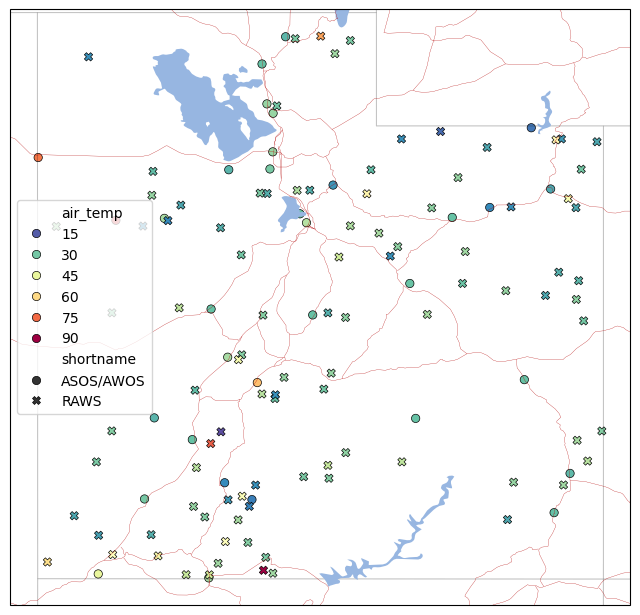

In [16]:
# Plot on a map

from herbie.toolbox import EasyMap, ccrs, pc

ax = EasyMap("10m", figsize=(8, 8)).STATES().LAKES().ROADS().ax
art = sns.scatterplot(
    df.filter(pl.col("longitude") < -60),  # One station has bad longitude metadata
    ax=ax,
    x="longitude",
    y="latitude",
    hue="air_temp",
    style="shortname",
    edgecolor="k",
    palette="Spectral_r",
)